In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
path = './data/'
p1= pd.read_csv(path+'users.csv')
p2= pd.read_csv(path+'books.csv')
p3= pd.read_csv(path+'train_ratings.csv')
p4= pd.read_csv(path+'sample_submission.csv')
p5= pd.read_csv(path+'test_ratings.csv') # test와 sample은 완벽하게 동일하다.

#조금 전처리됨
p6= pd.read_csv('/opt/ml/input/code/pre_users.csv')

users  =p6.copy()
books  =p2.copy()
train  =p3.copy()
sample =p4.copy()
test   =p5.copy()

print('users shape: ', users.shape) 
print(users.columns)#유저id, 지역, 나이
print('books shape: ', books.shape)
print(books.columns)#isbn(책번호), 제목, 저자, 출판년도, 출판사, img주소, 언어, 범주, 요약, img경로
print('train shape: ', train.shape) 
print(train.columns)# 유저 id, 책isbn, 평점
users

users shape:  (68092, 5)
Index(['user_id', 'age', 'city', 'state', 'country'], dtype='object')
books shape:  (149570, 10)
Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')
train shape:  (306795, 3)
Index(['user_id', 'isbn', 'rating'], dtype='object')


,user_id,age,city,state,country
0,8,NaN,timmins,ontario,canada
1,11400,49.0,ottawa,ontario,canada
2,11676,NaN,NaN,NaN,NaN
3,67544,30.0,toronto,ontario,canada
4,85526,36.0,victoria,britishcolumbia,canada
...,...,...,...,...,...
68087,278376,54.0,danville,california,usa
68088,278621,74.0,victoria,britishcolumbia,canada
68089,278636,NaN,irvington,alabama,usa
68090,278659,33.0,vancouver,britishcolumbia,canada


In [2]:
tmp = train['user_id'].unique()
no_exist = test[test['user_id'].isin(tmp) == False]
print('평점 없는 유저가 내릴 평점 갯수')
print(len(no_exist['user_id']))
print('평점 없는 유저 수')
print(len(set(no_exist['user_id'])))

평점 없는 유저가 내릴 평점 갯수
8677
평점 없는 유저 수
8266


In [3]:
no_exist = no_exist.merge(users).merge(books)
no_exist


,user_id,isbn,rating,age,city,state,country,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
0,263256,1558746218,0,NaN,knoxville,tennessee,usa,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.0...,NaN,NaN,NaN,images/1558746218.01.THUMBZZZ.jpg
1,12923,0440234743,0,39.0,louisville,kentucky,usa,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],"A suicidal billionaire, a burnt-out Washington...",images/0440234743.01.THUMBZZZ.jpg
2,116127,0440234743,0,NaN,vancouver,britishcolumbia,canada,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],"A suicidal billionaire, a burnt-out Washington...",images/0440234743.01.THUMBZZZ.jpg
3,128463,0440234743,0,NaN,jerseycity,newjersey,usa,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],"A suicidal billionaire, a burnt-out Washington...",images/0440234743.01.THUMBZZZ.jpg
4,131703,0440234743,0,NaN,endicott,newyork,usa,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,['Fiction'],"A suicidal billionaire, a burnt-out Washington...",images/0440234743.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8672,275579,270022793X,0,47.0,marcqenbaroeul,nord,france,Papy bat tous les records,Beatrice Rouer,2002.0,Rageot,http://images.amazon.com/images/P/270022793X.0...,fr,['Germany'],Afin de faire de la publicité pour le magasin ...,images/270022793X.01.THUMBZZZ.jpg
8673,275828,0802138748,0,55.0,arlington,virginia,usa,Woodcuts of Women: Stories,Dagoberto Gilb,2002.0,Grove Press,http://images.amazon.com/images/P/0802138748.0...,en,['Fiction'],A collection of stories by the award-winning L...,images/0802138748.01.THUMBZZZ.jpg
8674,276067,0694004162,0,36.0,reston,virginia,usa,If You Give a Mouse a Cookie/Mini Book and Mou...,Laura Joffe Numeroff,1992.0,HarperCollins Publishers,http://images.amazon.com/images/P/0694004162.0...,en,['Juvenile Fiction'],Relating the cycle of requests a mouse is like...,images/0694004162.01.THUMBZZZ.jpg
8675,277079,3499263998,0,NaN,berlin,berlin,germany,Eine Zierde in ihrem Hause. Die Geschichte der...,Asta Scheib,2002.0,Wunderlich im Rowohlt,http://images.amazon.com/images/P/3499263998.0...,NaN,NaN,NaN,images/3499263998.01.THUMBZZZ.jpg


In [4]:
len(no_exist['user_id']) / len(test)

0.11313054929008201

<BarContainer object of 91 artists>

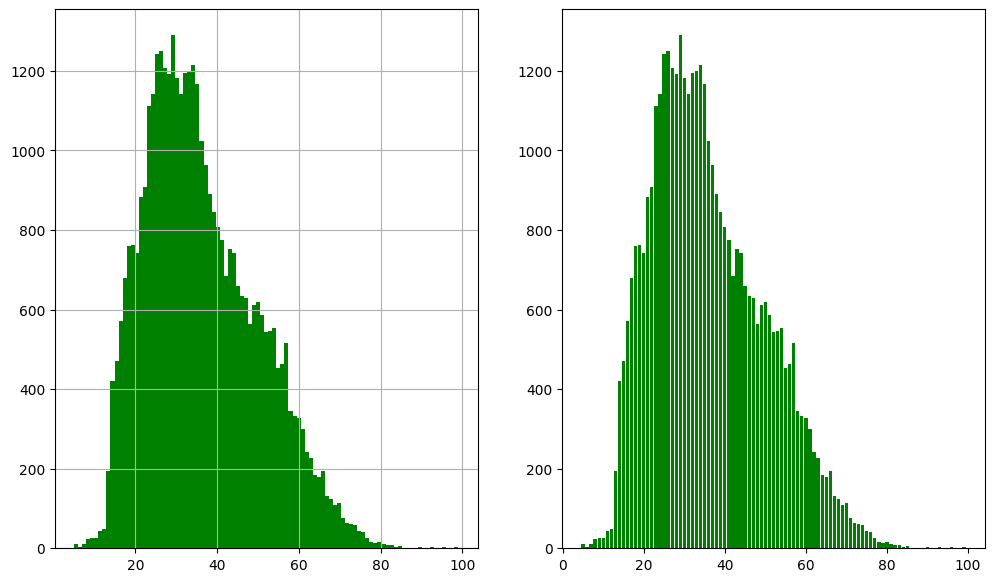

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12, 7))
ax = ax.flatten()
users['age'].hist(bins=95, color='green', ax=ax[0])

cold_age = users['age'].value_counts().to_dict()
ax[1].bar(cold_age.keys(), cold_age.values(), color='green')
#같은 그래프. 그냥 뭐가 다른가 찍어봤다.
#전체 유저 나이대.


<BarContainer object of 76 artists>

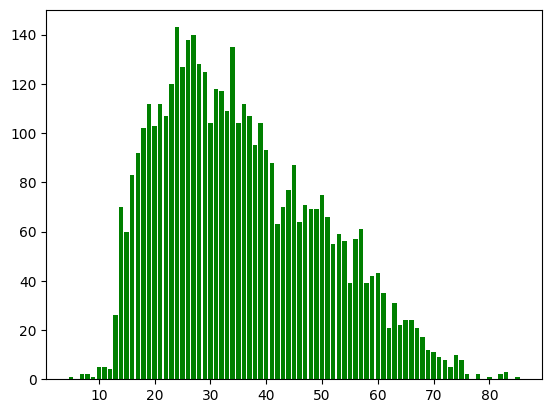

In [6]:
#일단 특정 나이대나 국가에 몰려있는지 확인해보자
fig, ax = plt.subplots(1,1)
cold_age = users[users['user_id'].isin(no_exist['user_id'])]['age'].value_counts().to_dict()
ax.bar(cold_age.keys(), cold_age.values(), color='green')

In [7]:
print(no_exist['age'].isna().sum())
no_exist['age'].isna().sum() / len(no_exist)
#콜유의 나이 결측치. 조금 높다.

3899


0.4493488532903077

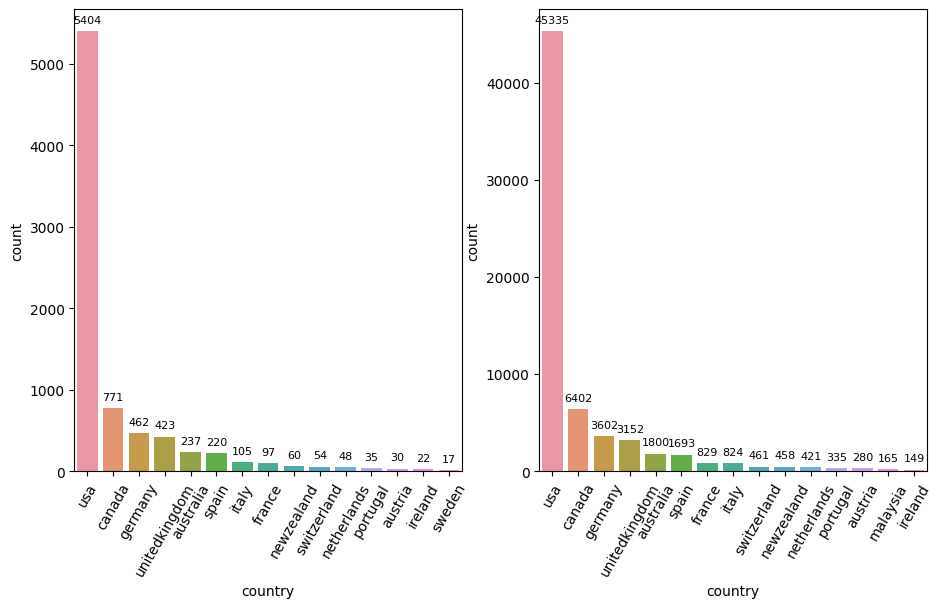

In [8]:
fig, ax= plt.subplots(1,2, figsize=(11,6))
ax = ax
my_dict=(users[users['user_id'].isin(no_exist['user_id'])]['country'].value_counts()).to_dict() # 국가별 콜유
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
sns.barplot(y = 'count',x= 'country' , data = f, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax[0].patches: 
    ax[0].annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

my_dict=(users['country'].value_counts()).to_dict() #국가별 평점자
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
sns.barplot(y = 'count',x= 'country' , data = f, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax[1].patches: 
    ax[1].annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.show()

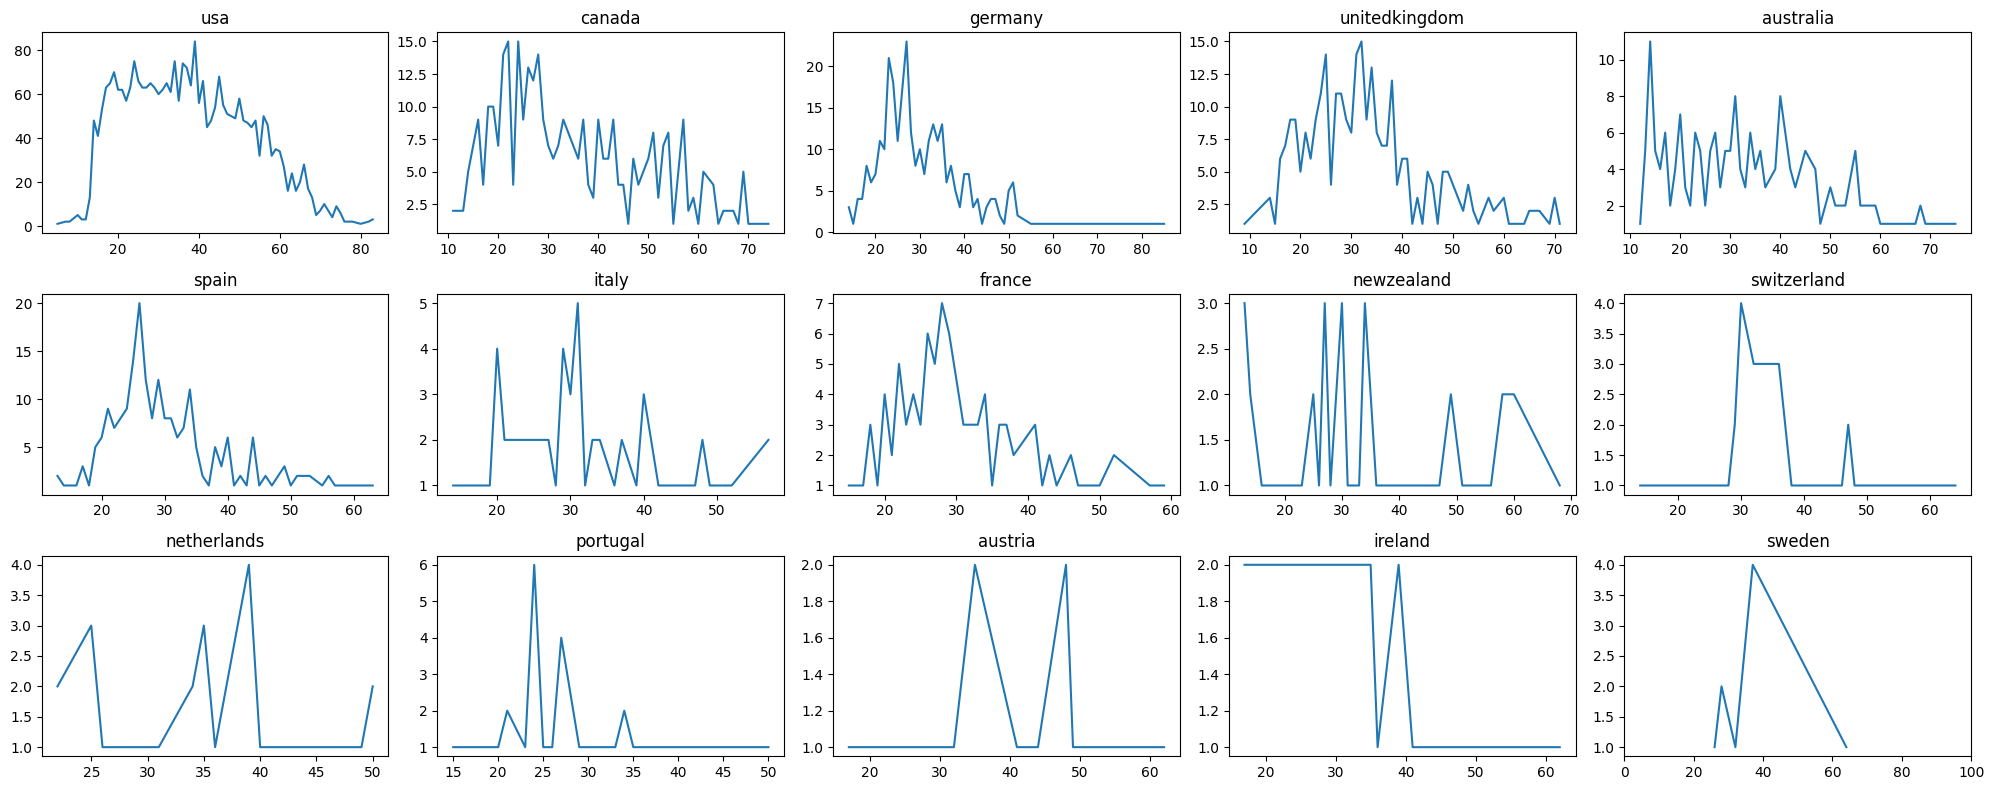

In [9]:
fig, ax = plt.subplots(3,5,figsize=(20,8))

my_dict=(users[users['user_id'].isin(no_exist['user_id'])]['country'].value_counts()).to_dict() # 국가별 콜유
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
#인구수 많은 상위 15개국 속 콜유들의 나이대
for country, ax_ in zip(f['country'], ax.flatten()):
    no_exist[no_exist['country'] == country]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

In [10]:
top_n = 15
cold_users_country_na_age = no_exist[no_exist['age'].isna()]['country'].value_counts().to_dict()
cold_users_country = no_exist['country'].value_counts()[:top_n].to_dict()
count = 0
for i,j,k in zip(cold_users_country_na_age.values(), cold_users_country.values(), cold_users_country.keys()):
	print(k, i/j)
	count += 1
	if count > top_n:
		break
# 국가별 콜유 나이 결측률

usa 0.48708033046229565
canada 0.554726368159204
germany 0.3711340206185567
unitedkingdom 0.3409090909090909
australia 0.27530364372469635
spain 0.2422907488986784
italy 0.18181818181818182
france 0.17475728155339806
newzealand 0.2786885245901639
switzerland 0.2727272727272727
netherlands 0.3
portugal 0.3611111111111111
austria 0.2903225806451613
ireland 0.3333333333333333
sweden 0.3888888888888889


# 잠시 책 데이터를 정제해보자. 특히 카테고리

In [11]:
books  =p2.copy()

In [12]:
import re

#re.sub(정규표현식, 치환 문자, 대상 문자열) replace해준다.
#\W는 알파벳, 숫자, _가 아닌 모든 문자, 즉 특수문자! +는 반복이 있을 수 있다는 것을 뜻한다.
books.loc[books[books['category'].notnull()].index, 'category'] = \
	books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())
books['category'] = books['category'].str.lower()

In [13]:
books['category'] = books['category'].fillna('1')

In [14]:
books[books['category'].str.contains('fiction')]

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,en,fiction,A Chinese immigrant who is convinced she is dy...,images/0399135782.01.THUMBZZZ.jpg
6,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,http://images.amazon.com/images/P/074322678X.0...,en,fiction,"Now back in print, Ann Beattie&#39;s finest sh...",images/074322678X.01.THUMBZZZ.jpg
7,0771074670,Nights Below Station Street,David Adams Richards,1988.0,Emblem Editions,http://images.amazon.com/images/P/0771074670.0...,en,fiction,Another story based in the fictional rural tow...,images/0771074670.01.THUMBZZZ.jpg
13,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994.0,River City Pub,http://images.amazon.com/images/P/1881320189.0...,en,fiction,A beautifully narrated novel of time and place...,images/1881320189.01.THUMBZZZ.jpg
14,0440234743,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,en,fiction,"A suicidal billionaire, a burnt-out Washington...",images/0440234743.01.THUMBZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...
149532,0821726595,Mistress of Falcon Court,Charlotte Lammert,1989.0,Kensington Pub Corp (Mm),http://images.amazon.com/images/P/0821726595.0...,en,fiction,Colin O&#39;Bannion&#39;s dying request places...,images/0821726595.01.THUMBZZZ.jpg
149556,1896095186,Pool-Hopping,Anne Fleming,2000.0,Polestar Book Publishers,http://images.amazon.com/images/P/1896095186.0...,en,fiction,The fascinating characters in this short story...,images/1896095186.01.THUMBZZZ.jpg
149559,0449225208,The Christmas Spirit,Patricia Wynn,1996.0,Ivy Books,http://images.amazon.com/images/P/0449225208.0...,en,fiction,"Taking human form as part of a wager, mischiev...",images/0449225208.01.THUMBZZZ.jpg
149563,0689818904,My Grandmother's Journey,John Cech,1998.0,Aladdin,http://images.amazon.com/images/P/0689818904.0...,en,juvenile fiction,A grandmother tells the story of her eventful ...,images/0689818904.01.THUMBZZZ.jpg


In [15]:
# books[books['category'].str.contains('fiction')]['category'].sample(50)

In [16]:
books['category'].value_counts().head(50)

1                                68851
fiction                          33016
juvenile fiction                  5835
biography autobiography           3326
history                           1927
religion                          1818
juvenile nonfiction               1418
social science                    1231
humor                             1161
body mind spirit                  1113
business economics                1073
cooking                           1025
health fitness                     971
family relationships               963
computers                          730
travel                             651
self help                          640
psychology                         635
poetry                             626
science                            624
art                                563
literary criticism                 561
nature                             490
philosophy                         481
reference                          471
drama                    

In [17]:
#  ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
#  'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
#  'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
#  'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india',
#  'history']


# 책의 카테고리를 손 보기 위해.. 학습 셋 속의 카테고리 파악 중

In [26]:
books.drop(columns=['img_url', 'img_path'], inplace=True, errors='ignore')
# print(books.sample(5))
all = pd.merge(train, users)
all = pd.merge(all, books)
all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306795 entries, 0 to 306794
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              306795 non-null  int64  
 1   isbn                 306795 non-null  object 
 2   rating               306795 non-null  int64  
 3   age                  214133 non-null  float64
 4   city                 299787 non-null  object 
 5   state                298103 non-null  object 
 6   country              300283 non-null  object 
 7   book_title           306795 non-null  object 
 8   book_author          306795 non-null  object 
 9   year_of_publication  306795 non-null  float64
 10  publisher            306795 non-null  object 
 11  language             187711 non-null  object 
 12  category             306795 non-null  object 
 13  summary              187711 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 35.1+ MB


In [19]:
train_category = all['category'].value_counts().to_dict()
for i in train_category:
	print(i, train_category[i])
	if train_category[i] < 100: break

1 121221
fiction 108998
juvenile fiction 12099
biography autobiography 7693
humor 3132
history 2740
religion 2402
body mind spirit 1738
juvenile nonfiction 1660
social science 1637
family relationships 1531
business economics 1511
self help 1394
health fitness 1290
cooking 1075
travel 999
poetry 847
psychology 819
true crime 804
literary criticism 758
computers 752
science 749
drama 709
political science 691
comics graphic novels 675
nature 662
philosophy 645
performing arts 586
art 584
reference 574
language arts disciplines 506
pets 469
literary collections 467
sports recreation 463
detective and mystery stories 455
crafts hobbies 417
education 373
medical 333
music 319
gardening 297
american fiction 269
adventure stories 263
foreign language study 239
children s stories 227
domestic fiction 226
horror tales 203
house home 201
english fiction 201
animals 180
law 175
technology engineering 170
games activities 161
games 155
photography 154
england 141
fantasy 139
adultery 136
science 

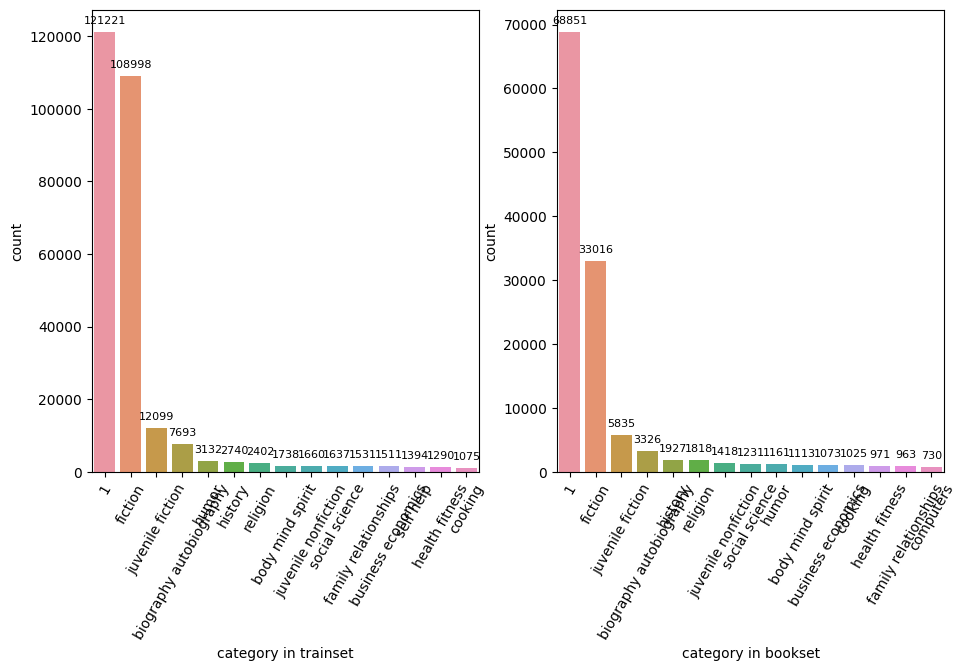

In [27]:
fig, ax= plt.subplots(1,2, figsize=(11,6))
ax = ax
my_dict= all['category'].value_counts().to_dict() #학습셋 내 범주 분포
count= pd.DataFrame(list(my_dict.items()),columns = ['category in trainset','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
sns.barplot(y = 'count',x= 'category in trainset' , data = f, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax[0].patches: 
    ax[0].annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

my_dict= books['category'].value_counts().to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['category in bookset','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
sns.barplot(y = 'count',x= 'category in bookset' , data = f, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax[1].patches: 
    ax[1].annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.show()

In [28]:
print('책데이터 내의 범주 결측')
print(len(books[books['category']=='1']) ,len(books[books['category']=='1']) / len(books))
print('학습데이터 내의 범주 결측')
print(len(all[all['category']=='1']) ,len(all[all['category']=='1']) / len(all))

책데이터 내의 범주 결측
68851 0.4603262686367587
학습데이터 내의 범주 결측
121221 0.39512052021708305


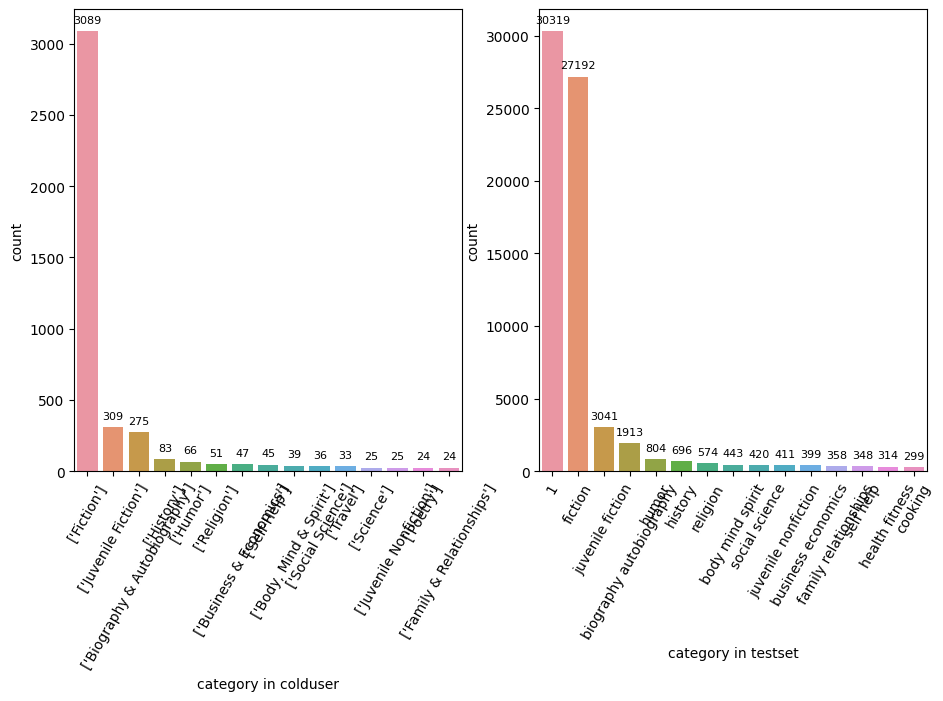

In [29]:
fig, ax= plt.subplots(1,2, figsize=(11,6))
ax = ax
my_dict= no_exist['category'].value_counts().to_dict() #콜유 내의 범주 분포
count= pd.DataFrame(list(my_dict.items()),columns = ['category in colduser','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
sns.barplot(y = 'count',x= 'category in colduser' , data = f, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax[0].patches: 
    ax[0].annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

tmp = test.merge(books)
my_dict= tmp['category'].value_counts().to_dict() #학습셋 내 범주 분포
count= pd.DataFrame(list(my_dict.items()),columns = ['category in testset','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
sns.barplot(y = 'count',x= 'category in testset' , data = f, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax[1].patches: 
    ax[1].annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.show()

In [30]:
print('콜유 내의 카테고리 결측률')
print(len(no_exist[no_exist['category']=='1']) ,len(no_exist[no_exist['category']=='1']) / len(no_exist))


콜유 내의 카테고리 결측률
0 0.0


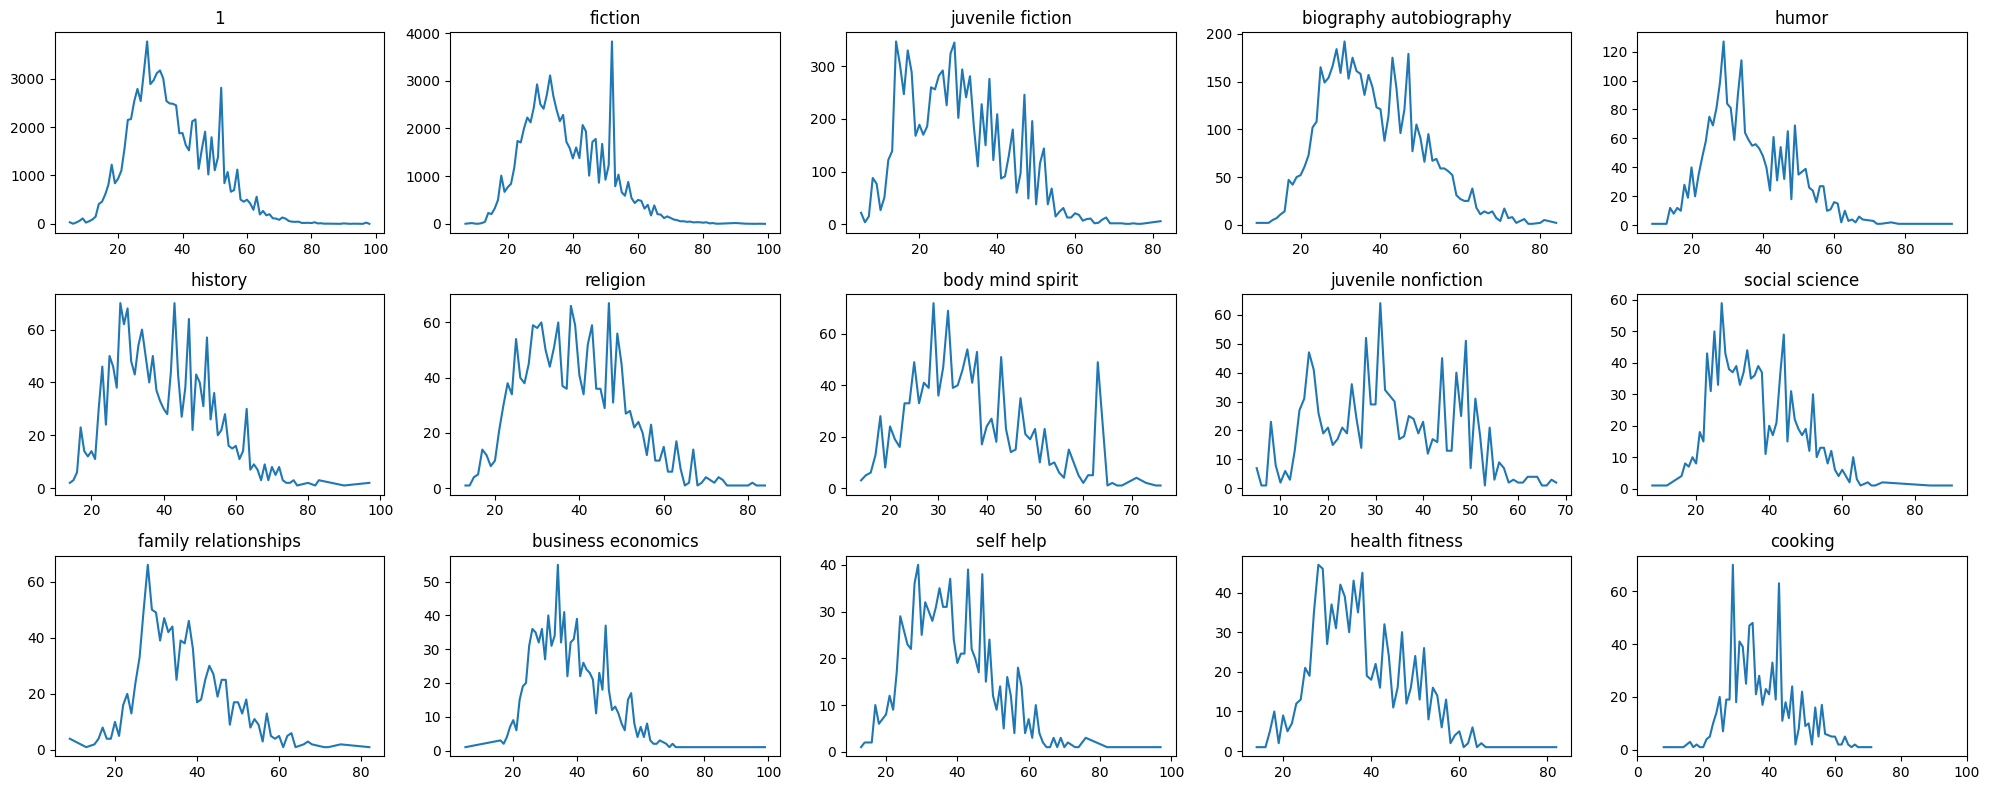

In [31]:
fig, ax = plt.subplots(3,5,figsize=(20,8))

my_dict=train_category
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
#학습셋 내의 상위 범주에서의 나이 분포.
for country, ax_ in zip(f['country'], ax.flatten()):
    all[all['category'] == country]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()

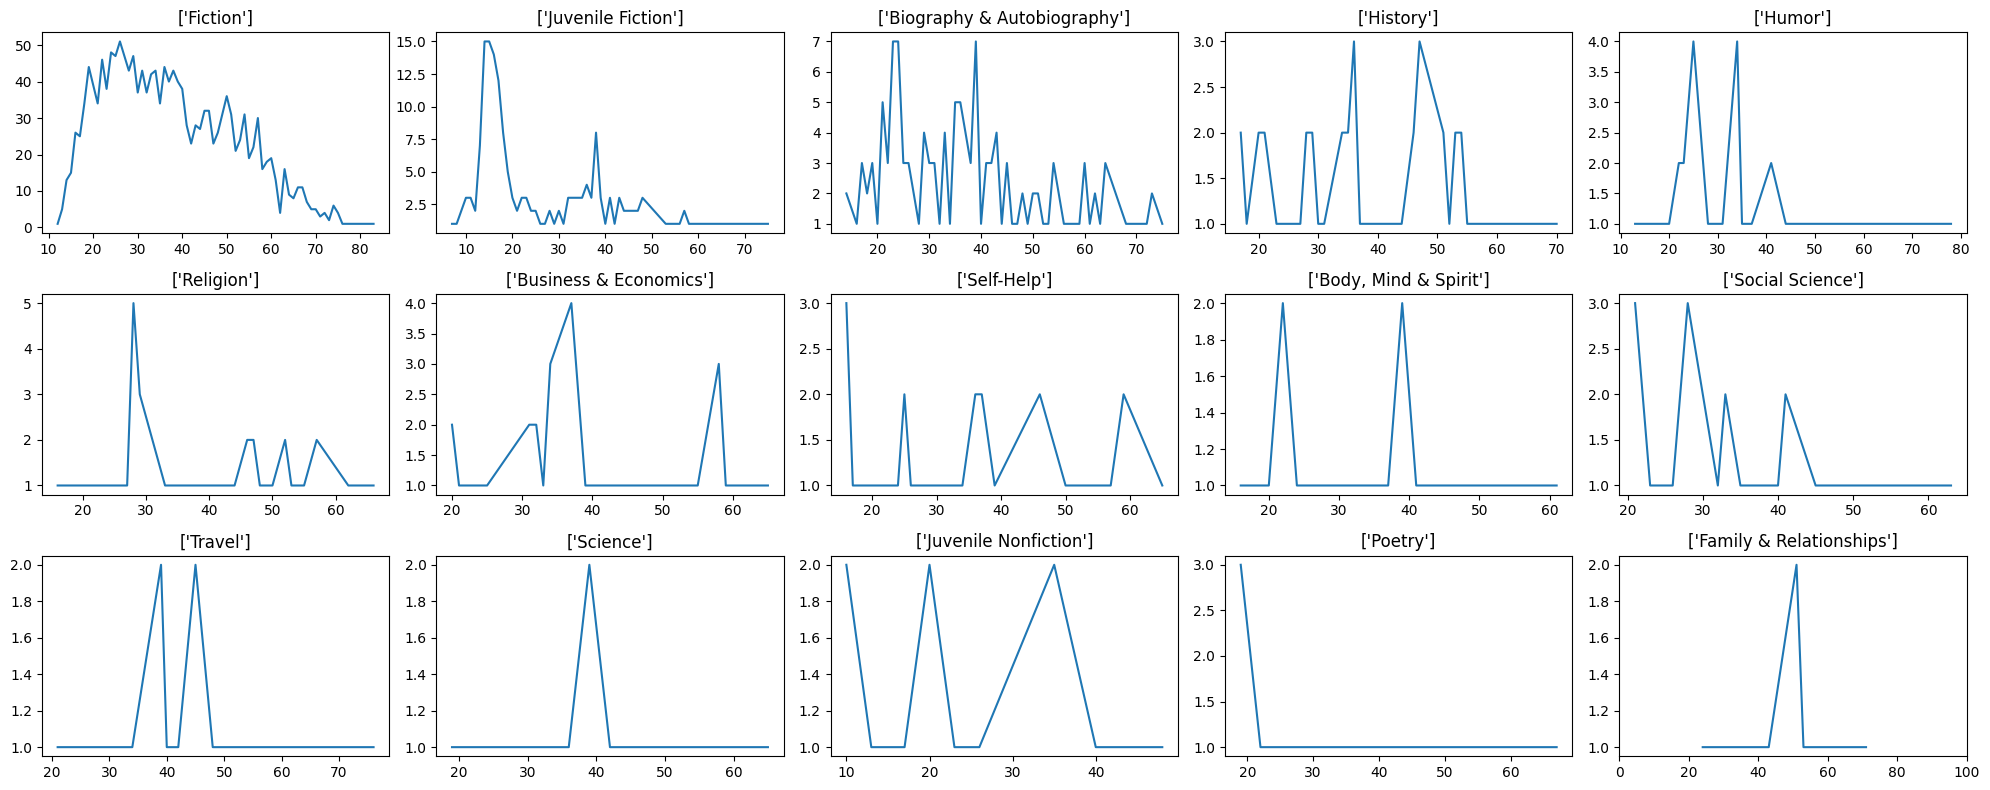

In [32]:
fig, ax = plt.subplots(3,5,figsize=(20,8))

my_dict=no_exist['category'].value_counts().to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
#콜유 내의 상위 범주에서의 나이 분포.
for country, ax_ in zip(f['country'], ax.flatten()):
    no_exist[no_exist['category'] == country]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()